# Protein Engineering?

> Protein engineering is the process of developing useful or valuable proteins. -wiki

단백질은 20가지의 아미노산으로 구성되어 있습니다. 아미노산의 순서와 비율에 따라서 단백질의 특성이 달라집니다. Protein engineering은 원하는 특성을 얻기위해 아미노산 서열을 바꾸는 작업이라고 할 수 있습니다. 그러한 작업에 머신러닝을 활용해보도록 하겠습니다.

# 데이터 준비

사용할 예시는 10개의 아미노산으로 구성된 펩타이트들 입니다. 0번부터 9번까지의 행은 각각의 아미노산 서열이며, 10번째 행은 각각의 펩타이드의 활성(Activity)입니다. 데이터는 **csv**포멧으로 저장되어 있습니다. `pandas`를 이용해 불러와 보겠습니다.

In [1]:
import pandas as pd
df = pd.read_csv('./data/random_seq.csv',header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
95,M,Y,T,H,G,M,C,F,D,T,11
96,M,V,K,P,N,E,S,K,Y,M,-2
97,M,Y,D,S,I,M,V,A,D,S,-2
98,M,M,T,K,I,E,F,C,Q,Y,23
99,M,M,M,C,T,V,S,W,V,N,-2


총 100개의 펩타이드가 들어있습니다. 마지막 행에 포함된 활성은 어떻게 분포되어 있는지 확인해 보죠.

In [2]:
df.describe()

,10
count,100.000000
mean,8.850000
std,12.077506
min,-2.000000
25%,-2.000000
50%,5.000000
75%,20.000000
max,42.000000


최솟값은 -2이고 최대값은 42입니다. 그리고 평균값은 8.85이군요. 표준편차는 약 12정도로 전체적으로 편차가 커보입니다.

# 데이터 전처리

아미노산 서열과 활성데이터를 각각 **X,y**로 분리하겠습니다. 아미노산 첫번째는 항상 메티오닌(M)임으로 데이터를 뺐습니다.

In [3]:
X = df.iloc[:, 1:10]
y = df[10]
X.head()

,1,2,3,4,5,6,7,8,9
0,F,V,R,M,K,K,Q,M,R
1,F,N,P,H,Y,D,Q,H,A
2,M,K,Y,K,A,A,P,R,G
3,T,T,E,N,H,C,C,H,K
4,R,H,Q,F,Q,L,G,I,N


In [4]:
y.shape

(100,)

아미노산 서열은  **문자열** 데이터임으로 **LabelEncoder**를 사용해서 변환을 해줘야 합니다.

In [5]:
from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)
X.head()

,1,2,3,4,5,6,7,8,9
0,4,17,14,10,8,8,13,10,14
1,4,11,12,6,19,2,13,6,0
2,10,8,19,8,0,0,12,14,5
3,16,16,3,11,6,1,1,6,8
4,14,6,13,4,13,9,5,7,11


각각의 아미노산이 숫자형으로 변환된것을 볼 수 있습니다.

## 상관관계 시각화

아미노산 서열의 순서에 어떠한 상관관계가 있는지 시각화를 통해 살펴보겠습니다.

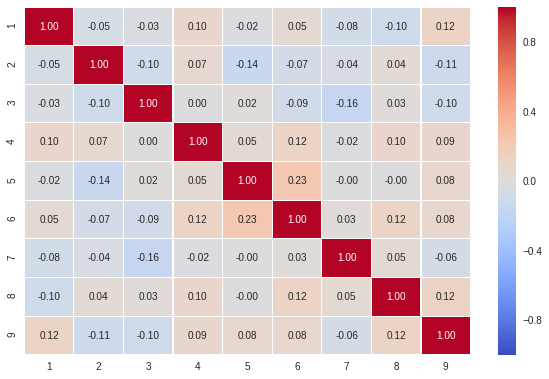

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

이 데이터는 랜덤하게 만들어낸 아미노산 서열임으로, 특별한 상관관계가 없다는것을 확인 할 수 있습니다.

## 학습용 데이터 나누기

학습용과 테스트용 데이터를 8:2 비율로 나누어봅니다. 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(80, 9) (80,)


# 모델 만들기

머신러닝용 모델로 Linear regression, SVM regression을 다뤄 보겠습니다.

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
reg.score(X_train, y_train)

0.091832216571533176

### RMSE로 성능평가하기

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

12.38585977457512

선형회귀 모델의 RMSE은 12.3으로 실제 데이터의 표준편차와 비슷한 차이가 있습니다. 





## Linear Support Vector Regression

In [27]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state=42)
regr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [28]:
regr.score(X_train, y_train)

-0.10473424190558854

In [29]:
y_pred = regr.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

14.725916506993723

# SVM

# 마치며,

사용한 모델중에 가장 좋은것은 선형 회귀였습니다. 이 모델을 이용해 실제로 측정하지 않고도 단백질의 활성을 예측할 수 있습니다.